### Задача 1

Что выведет этот код?

Ответом на эту задачу является выведенное число, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

X_data, y_data = load_breast_cancer(return_X_y=True)

print(cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=42, random_state=42), X_data, y_data, cv=3).mean())

0.9648473034437947


### Задача 2

Напишите свою функцию определения качества модели по следующей метрике: максимальный precision, при условии, что $precision < 1.5 * recall$ и $recall > 0.5$ и определите наилучшее её значение, перебирая гиперпараметры по предложенной сетке

Ответом на эту задачу является максимальное значение качества по предложенной метрике, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['entropy', 'gini']
}

X_data, y_data = load_breast_cancer(return_X_y=True)

estimator = RandomForestClassifier(random_state=42)

print('Accuracy best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring='precision').fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)


from sklearn.metrics import precision_recall_curve
def my_loss(y, y_pred):
    precision, recall, _ = precision_recall_curve(y, y_pred[:, 1])
    return precision[(precision < 1.5 * recall) & (recall > 0.5)].max()
scorer = make_scorer(my_loss, greater_is_better=True, needs_proba=True)

print('Custom loss best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring=scorer).fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Accuracy best params and score
	Params: {'max_depth': None, 'criterion': 'gini', 'n_estimators': 10}
	Score: 0.9688196110664571
Custom loss best params and score
	Params: {'max_depth': 5, 'criterion': 'gini', 'n_estimators': 50}
	Score: 0.9942015090366172


### Задача 3

Какова минимальная сторона квадрата, содержащего все точки из $X$? 

Ответом на эту задачу является число, округлённое до 2го знака, дробная часть отделяется точкой.

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data[:, :2]

In [26]:
from scipy.optimize import minimize
import numpy as np

minimize(lambda point: np.abs(point - X).max() * 2, np.mean(X, axis=0), method='Nelder-Mead')

 final_simplex: (array([[14.00131309, 24.495     ],
       [14.00138573, 24.495     ],
       [14.00121852, 24.495     ]]), array([29.57, 29.57, 29.57]))
           fun: 29.570000000000007
       message: 'Optimization terminated successfully.'
          nfev: 153
           nit: 86
        status: 0
       success: True
             x: array([14.00131309, 24.495     ])

In [32]:
max(*(X.max(axis=0) - X.min(axis=0)))

29.57

### Задача 3* - Если можно поворачивать

In [35]:
def rotate(X, angle):
    res = np.copy(X)
    res[:, 0] = np.cos(angle) * X[:, 0] - np.sin(angle) * X[:, 1]
    res[:, 1] = np.sin(angle) * X[:, 0] + np.cos(angle) * X[:, 1]
    return res

def create_loss(angle):
    def loss(point):
        return 2. * np.max(np.abs(rotate(X - point, angle)))
    return loss

In [40]:
args = np.linspace(0, np.pi / 2, num=1000)
results = []
for angle in args:
    results.append(minimize(create_loss(angle), np.mean(X, axis=0), method='Nelder-Mead').fun)

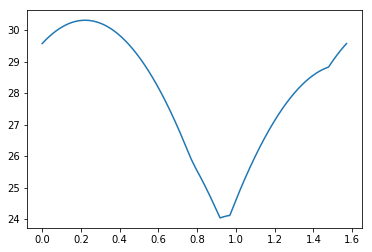

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(args, results)

plt.show()

In [44]:
print(np.min(results))
print(np.argmin(results))
print(args[np.argmin(results)])

24.03623297182242
584
0.918263318166386


In [51]:
args = np.linspace(0.9, 1., num=100)
results = []
for angle in args:
    results.append(minimize(create_loss(angle), np.mean(X, axis=0), method='Nelder-Mead').fun)

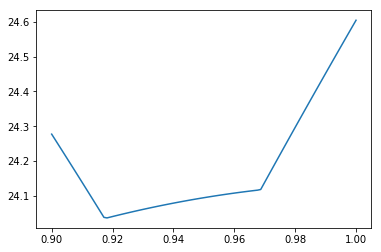

In [52]:
plt.plot(args, results)
plt.show()

In [53]:
print(np.min(results))
print(np.argmin(results))
print(args[np.argmin(results)])

24.036052892767415
18
0.9181818181818182


Два способа

In [54]:
def final_loss(x):
    point = np.array(x[:2])
    angle = x[2]
    return 2. * np.max(np.abs(rotate(X - point, angle)))

In [55]:
x, y = np.mean(X, axis=0)
minimize(final_loss, (x, y, 0.91), method='Nelder-Mead')

 final_simplex: (array([[15.19937291, 22.46392248,  0.91740809],
       [15.19931592, 22.46400032,  0.91740848],
       [15.19941343, 22.46386989,  0.91740844],
       [15.19930655, 22.46400995,  0.91740853]]), array([24.03433645, 24.0343367 , 24.03433909, 24.03433935]))
           fun: 24.034336453303187
       message: 'Optimization terminated successfully.'
          nfev: 158
           nit: 88
        status: 0
       success: True
             x: array([15.19937291, 22.46392248,  0.91740809])

In [58]:
x, y = np.mean(X, axis=0)
minimize(final_loss, (x, y, 0.92), method='Nelder-Mead')

 final_simplex: (array([[15.20271213, 22.45956436,  0.91740861],
       [15.20276629, 22.45949705,  0.91740933],
       [15.20266413, 22.45963126,  0.91740923],
       [15.20265304, 22.45964727,  0.91740975]]), array([24.03433655, 24.03433868, 24.03433886, 24.03433966]))
           fun: 24.03433654651465
       message: 'Optimization terminated successfully.'
          nfev: 166
           nit: 91
        status: 0
       success: True
             x: array([15.20271213, 22.45956436,  0.91740861])

In [56]:
args = np.linspace(0.9, 1., num=10000)
results = []
for angle in args:
    results.append(minimize(create_loss(angle), np.mean(X, axis=0), method='Nelder-Mead').fun)

In [57]:
print(np.min(results))
print(np.argmin(results))
print(args[np.argmin(results)])

24.034343480816986
1741
0.9174117411741174
